In [1]:

from datetime import datetime

import torch
from torch.utils.data import DataLoader

from datasets.LabeledImageDataset import LabeledImageDataset
from models.resnet import Resnet18Model
from train import train_classifier
from utils import plot_model_metrics
from utils import reduce_dataset, split_dataset, undersample_dataset

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

batch_size = 256
dataset = LabeledImageDataset("data/candidates")
dataset = reduce_dataset(dataset, discard_ratio=0.0)
train_dataset, test_dataset = split_dataset(dataset, train_ratio=0.7)
train_dataset = undersample_dataset(train_dataset)

train_loader = DataLoader(train_dataset,
                          batch_size=batch_size,
                          shuffle=True)
test_loader = DataLoader(test_dataset,
                         batch_size=batch_size,
                         shuffle=True, )

model = Resnet18Model(hidden_layers=1, units_per_layer=2048, dropout=0.2,focal_alpha=0.04)

print(f"Dataset: {len(train_dataset):,} training, {len(test_dataset):,} testing")


Device: cuda:0
Dataset: 1,618 training, 6,069 testing


In [2]:
print(model)

Resnet18Model(
  (pretrained_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

In [3]:
print(f"Training starts {datetime.now().isoformat()}")

Training starts 2025-01-30T12:40:39.001282


In [4]:

model = model.to(device)
model, model_metrics = train_classifier(model, train_loader, test_loader, device,
                                        learning_rate=0.0001,
                                        max_epochs=20,
                                        checkpoint_every=1,
                                        eval_every=1)


Epoch 1 training: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]


Train: 1/20: loss:0.005600349977612495


Epoch 1 testing: 100%|██████████| 24/24 [00:14<00:00,  1.66it/s]


Test: 1/20: loss:0.00378475531276005, accuracy:0.8399246805939228, precision:0.23727937467456464, recall:0.8070147421879232, f1:0.3642874283604107, mcc:0.3794055892844778, ece:0.16007531931002936, epoch:0


Epoch 2 training: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train: 2/20: loss:0.004220370436087251


Epoch 2 testing: 100%|██████████| 24/24 [00:14<00:00,  1.71it/s]


Test: 2/20: loss:0.0028445279458537698, accuracy:0.8698006589548802, precision:0.2647980938387929, recall:0.7262626690403393, f1:0.38248677346266663, mcc:0.3824374706201108, ece:0.13019934048255286, epoch:1


Epoch 3 training: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Train: 3/20: loss:0.004387201009584325


Epoch 3 testing: 100%|██████████| 24/24 [00:14<00:00,  1.68it/s]


Test: 3/20: loss:0.004171821958152577, accuracy:0.8134621748388581, precision:0.22032586516065478, recall:0.8883165762471102, f1:0.3517740910613499, mcc:0.3835105576483899, ece:0.18653782519201437, epoch:2


Epoch 4 training: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


Train: 4/20: loss:0.003761101081701262


Epoch 4 testing: 100%|██████████| 24/24 [00:14<00:00,  1.66it/s]


Test: 4/20: loss:0.006512261112220585, accuracy:0.7239763179097606, precision:0.16467602599208922, recall:0.9473198823092398, f1:0.2788825156065388, mcc:0.32234177026178273, ece:0.2760236822068691, epoch:3


Epoch 5 training: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Train: 5/20: loss:0.0037770180829933713


Epoch 5 testing: 100%|██████████| 24/24 [00:14<00:00,  1.67it/s]


Test: 5/20: loss:0.0032239819799239435, accuracy:0.8544058615331491, precision:0.25891445321226736, recall:0.8213040979488347, f1:0.38865284555797447, mcc:0.4053274851145081, ece:0.1455941383416454, epoch:4


Epoch 6 training: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train: 6/20: loss:0.003389128849708608


Epoch 6 testing: 100%|██████████| 24/24 [00:14<00:00,  1.60it/s]


Test: 6/20: loss:0.003048564181275045, accuracy:0.8604558730432781, precision:0.26397999701938196, recall:0.8107958143078112, f1:0.3938885541750557, mcc:0.4078337015403113, ece:0.13954412657767534, epoch:5


Epoch 7 training: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Train: 7/20: loss:0.003103398984032018


Epoch 7 testing: 100%|██████████| 24/24 [00:14<00:00,  1.63it/s]


Test: 7/20: loss:0.005293327112061282, accuracy:0.7675520473641805, precision:0.19072858719440533, recall:0.9434974833388147, f1:0.3150389485405691, mcc:0.35900681731171447, ece:0.23244795141120753, epoch:6


Epoch 8 training: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Train: 8/20: loss:0.00309595196241779


Epoch 8 testing: 100%|██████████| 24/24 [00:14<00:00,  1.61it/s]


Test: 8/20: loss:0.0031403691100422293, accuracy:0.8594001784069981, precision:0.2666421710430537, recall:0.8217028198839343, f1:0.3994201333764962, mcc:0.414776095276147, ece:0.14059982045243183, epoch:7


Epoch 9 training: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


Train: 9/20: loss:0.0029257146109427723


Epoch 9 testing: 100%|██████████| 24/24 [00:15<00:00,  1.57it/s]


Test: 9/20: loss:0.0027230211708229035, accuracy:0.8792524530962247, precision:0.2934772839221489, recall:0.7852442352539102, f1:0.4235079554414807, mcc:0.4304243006207842, ece:0.12074754635492961, epoch:8


Epoch 10 training: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


Train: 10/20: loss:0.002802427525499037


Epoch 10 testing: 100%|██████████| 24/24 [00:14<00:00,  1.60it/s]


Test: 10/20: loss:0.003961254561242337, accuracy:0.8312426263236649, precision:0.23879270255392435, recall:0.8802790990091184, f1:0.3701584945092032, mcc:0.40023614571214433, ece:0.1687573747088512, epoch:9


Epoch 11 training: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


Train: 11/20: loss:0.0027329778032643454


Epoch 11 testing: 100%|██████████| 24/24 [00:14<00:00,  1.61it/s]


Test: 11/20: loss:0.011324048469153544, accuracy:0.6142452232965009, precision:0.12825987803962746, recall:0.9854719555806511, f1:0.22614189726295364, mcc:0.26941185025084163, ece:0.3857547764976819, epoch:10


Epoch 12 training: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train: 12/20: loss:0.0034594475624284576


Epoch 12 testing: 100%|██████████| 24/24 [00:14<00:00,  1.64it/s]


Test: 12/20: loss:0.0038131733890622854, accuracy:0.8391459484346225, precision:0.24563811355192358, recall:0.8747516610568082, f1:0.3807165361784248, mcc:0.4084227469685311, ece:0.16085405151049295, epoch:11


Epoch 13 training: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


Train: 13/20: loss:0.0026258523243346383


Epoch 13 testing: 100%|██████████| 24/24 [00:15<00:00,  1.58it/s]


Test: 13/20: loss:0.0024136026525714747, accuracy:0.8937938823664825, precision:0.3142471648043789, recall:0.7435757549196017, f1:0.43585423507290244, mcc:0.4349682400460269, ece:0.10620611688743035, epoch:12


Epoch 14 training: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train: 14/20: loss:0.002489563144211258


Epoch 14 testing: 100%|██████████| 24/24 [00:15<00:00,  1.59it/s]


Test: 14/20: loss:0.007086734015805026, accuracy:0.7285219196017495, precision:0.16795915059967484, recall:0.9538092755198019, f1:0.284175335554183, mcc:0.3297583155725734, ece:0.27147808112204075, epoch:13


Epoch 15 training: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


Train: 15/20: loss:0.002564024180173874


Epoch 15 testing: 100%|██████████| 24/24 [00:15<00:00,  1.57it/s]


Test: 15/20: loss:0.005206742081403111, accuracy:0.7930937428061694, precision:0.20740175769333294, recall:0.9118729132709396, f1:0.3360038695085666, mcc:0.37310054659316655, ece:0.20690625657637915, epoch:14


Epoch 16 training: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]


Train: 16/20: loss:0.0023071879654058386


Epoch 16 testing: 100%|██████████| 24/24 [00:15<00:00,  1.56it/s]


Test: 16/20: loss:0.003039917821297422, accuracy:0.8672126784069981, precision:0.277191745114378, recall:0.8119943217185864, f1:0.40883033416710873, mcc:0.42213425660842524, ece:0.13278732107331356, epoch:15


Epoch 17 training: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Train: 17/20: loss:0.0021461317415482233


Epoch 17 testing: 100%|██████████| 24/24 [00:15<00:00,  1.57it/s]


Test: 17/20: loss:0.0037225872317018607, accuracy:0.8479952592656538, precision:0.2555176979282467, recall:0.867200286956479, f1:0.3908342437347714, mcc:0.4167879603999851, ece:0.1520047395800551, epoch:16


Epoch 18 training: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]


Train: 18/20: loss:0.001940897965271558


Epoch 18 testing: 100%|██████████| 24/24 [00:15<00:00,  1.51it/s]


Test: 18/20: loss:0.003949925914639607, accuracy:0.8426754215584715, precision:0.24828260275347622, recall:0.8718541010646274, f1:0.3824958408884139, mcc:0.409995571347943, ece:0.1573245795443654, epoch:17


Epoch 19 training: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


Train: 19/20: loss:0.0018239136885053345


Epoch 19 testing: 100%|██████████| 24/24 [00:15<00:00,  1.52it/s]


Test: 19/20: loss:0.003158339658208812, accuracy:0.8700308615331491, precision:0.28006457407361435, recall:0.8099738450260897, f1:0.4104366059115709, mcc:0.4237541562927248, ece:0.12996913803120455, epoch:18


Epoch 20 training: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Train: 20/20: loss:0.0019299111861203397


Epoch 20 testing: 100%|██████████| 24/24 [00:16<00:00,  1.45it/s]


Test: 20/20: loss:0.004341379545318584, accuracy:0.8373438938766115, precision:0.2439038516926352, recall:0.865413312607585, f1:0.37791673065371056, mcc:0.40365620595448143, ece:0.1626561051234603, epoch:19


Training ends 2025-01-30T12:47:04.176587
Test accuracy: 0.8373438938766115
Test precision: 0.2439038516926352
Test recall: 0.865413312607585
Test f1: 0.37791673065371056
Test mcc: 0.40365620595448143


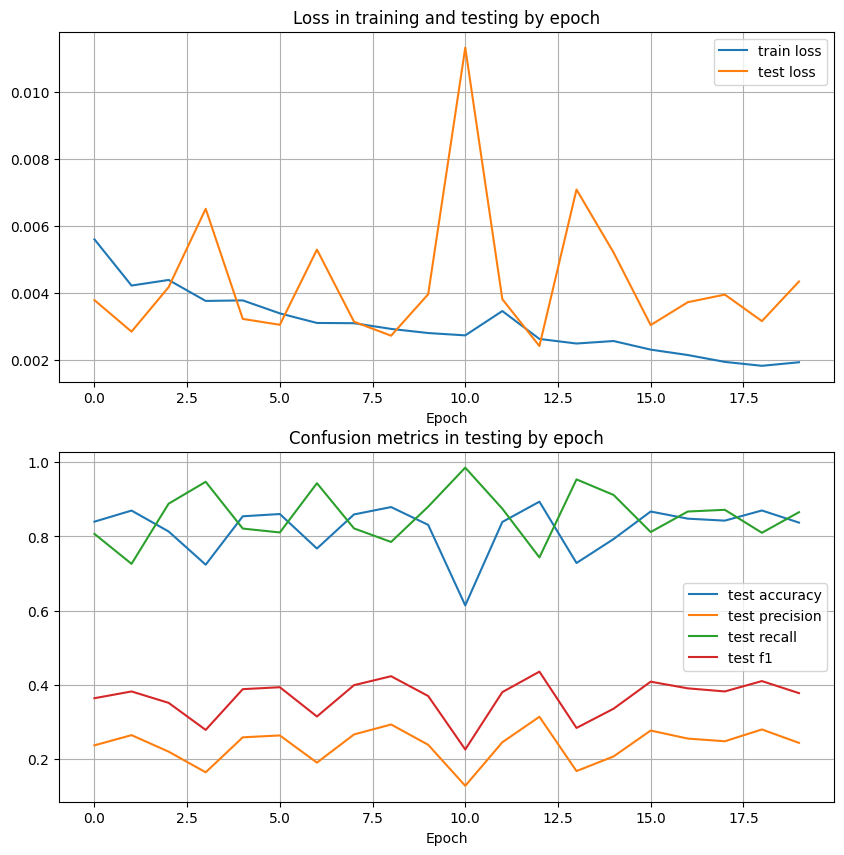

In [5]:

print(f"Training ends {datetime.now().isoformat()}")
for metric in ["accuracy", "precision", "recall", "f1", "mcc"]:
    if len(model_metrics[f"test_{metric}"]) > 0:
        print(f"Test {metric}:", model_metrics[f"test_{metric}"][-1])

plot_model_metrics(model_metrics)

In [6]:
torch.save(model, "model.pickle")